### Reading download log information (Client downloading 0.1mb file every minute) 4 clients and 5 proxy nodes

In [3]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

EXP_NAME = "logs/client_var"
RESULTS_DIR = os.path.join( os.getcwd(),'results')

headers = ['time', 'start_transfer', 'download','status','download_size']
proxies = {'10.138.25.67':'5126', '10.139.40.85':'57064', '10.138.77.2':'11252',
           '10.138.57.2':'7193','10.138.85.130':'10473'}

#Read input files from the directory and returns DataTable object in a combined list
def read_clients_log():
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]  
    print(dirs)
    proxy_data = pd.read_csv(os.path.join('clients.csv'),sep=',')
    #Load results from each node
    nodes_results = None
    for sub_dir in dirs:        
        tunnel_nodes = os.listdir(INPUT_DIR+'/'+sub_dir)
        for tunnel in tunnel_nodes:                
            file = os.path.join(INPUT_DIR+'/'+sub_dir,tunnel)
            tunnel = tunnel[0:tunnel.find(':')]
            try:
                temp = pd.read_csv(file,sep=',', header = None)
                temp.columns = headers
                temp = temp.query('status == 200 & download_size >0')
                temp = temp.set_index(pd.DatetimeIndex(temp.time))
                temp['proxy'] = proxies[tunnel]
                temp['client'] = sub_dir
                temp['download_time'] = temp['download'] - temp['start_transfer']
                nodes_results = pd.concat([nodes_results, temp])
            except Exception as e:
                print(node, 'EXception', e)
    return nodes_results

def getECDF(df, var):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[var].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()
    return ecdf

client_data = read_clients_log()
client_data.head()

['65', '75', '108', '132']


,time,start_transfer,download,status,download_size,proxy,client,download_time
time,,,,,,,,
2018-02-03 12:11:00,2018/02/03 12:11,0.007403,5.428054,200,1048576,5126,65,5.420651
2018-02-03 12:19:00,2018/02/03 12:19,0.007291,5.427816,200,1048576,5126,65,5.420525
2018-02-03 12:20:00,2018/02/03 12:20,0.006953,5.423696,200,1048576,5126,65,5.416743
2018-02-03 12:21:00,2018/02/03 12:21,0.007284,5.419459,200,1048576,5126,65,5.412175
2018-02-03 12:21:00,2018/02/03 12:21,0.007341,5.422289,200,1048576,5126,65,5.414948


### Function to plot variability in latency over time period, to show that best path performance variation changes over time

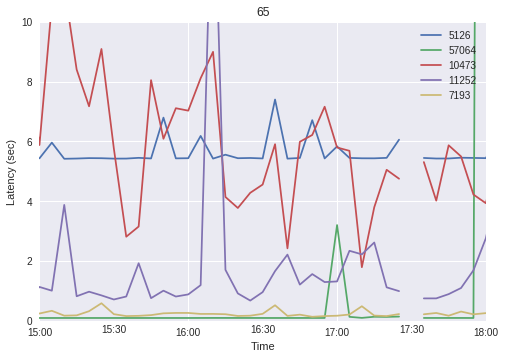

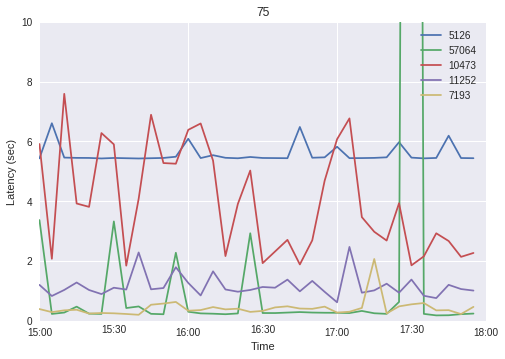

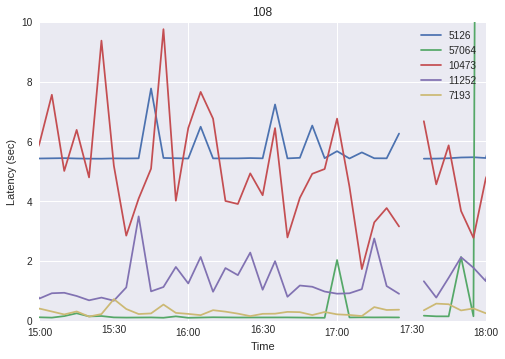

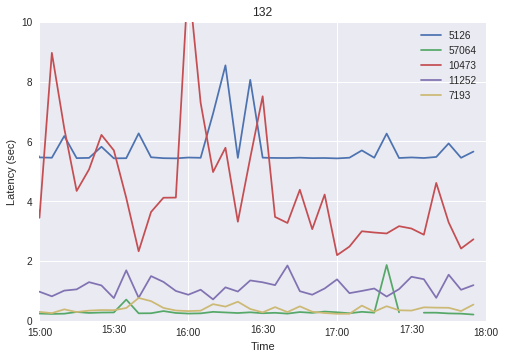

5126 > 65 > 5.5975816466618795
57064 > 65 > 2.2076945188413224
10473 > 65 > 2.723406575261158
11252 > 65 > 1.2310149271130084
7193 > 65 > 0.38523930213776697
5126 > 75 > 5.5975816466618795
57064 > 75 > 2.2076945188413224
10473 > 75 > 2.723406575261158
11252 > 75 > 1.2310149271130084
7193 > 75 > 0.38523930213776697
5126 > 108 > 5.5975816466618795
57064 > 108 > 2.2076945188413224
10473 > 108 > 2.723406575261158
11252 > 108 > 1.2310149271130084
7193 > 108 > 0.38523930213776697
5126 > 132 > 5.5975816466618795
57064 > 132 > 2.2076945188413224
10473 > 132 > 2.723406575261158
11252 > 132 > 1.2310149271130084
7193 > 132 > 0.38523930213776697


In [6]:
def plot_latency(df_clients,var):    
    clients = df_clients.client.unique()
    for client in clients:                
        df = df_clients.query('client == "'+client+'"')
        proxies = df.proxy.unique()
        labels = []
        for proxy in proxies:
            df_proxy = df.query('proxy == "'+proxy+'"')
            df_proxy = df_proxy.resample('5Min').mean()
            labels.append(proxy)
            df_proxy['download'].plot()
            #print(client,">",proxy,">",df_proxy['download'].mean())
            #ecdf = getECDF(df_proxy, 'bytes_second')
            #ecdf.plot(logx=True)
            #print(client,":",proxy,":",df_proxy.bytes_second.max())
        plt.legend(labels)
        plt.title(client)
        plt.ylabel('Latency (sec)')
        plt.xlabel('Time')
        plt.ylim(0,10)
        plt.xlim('04-Feb-2018 15:00','04-Feb-2018 18:00',)
        plt.show()

def show_avg_latency(df):
    clients = df.client.unique()
    for client in  clients:
        df_client = df.query('client == "'+client+'"')
        proxies = df_client.proxy.unique()
        for proxy in proxies:
            df_proxy = df.query('proxy == "'+proxy+'"')
            print(proxy,">", client, ">",df_proxy['download'].mean())

plot_latency(client_data,'download')
show_avg_latency(client_data)

### Randomized selection for every minute compared with uniform random and best, worst scenario

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  # Remove the CWD from sys.path while we load stuff.
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  from ipykernel import kernelapp as app


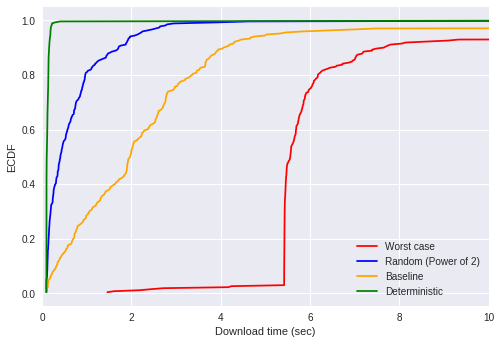

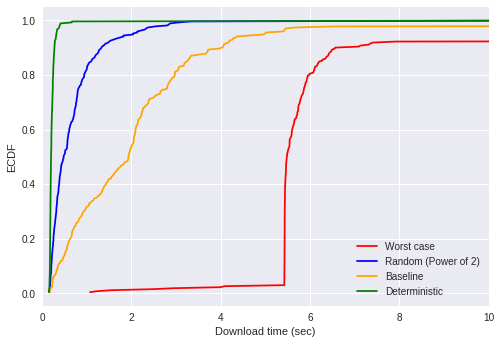

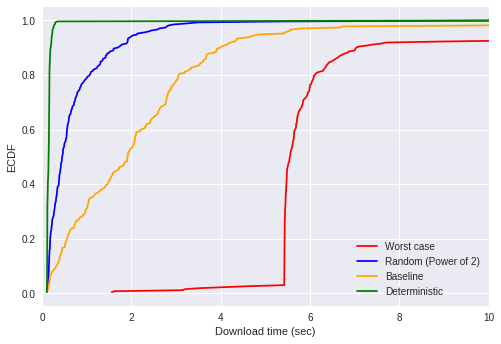

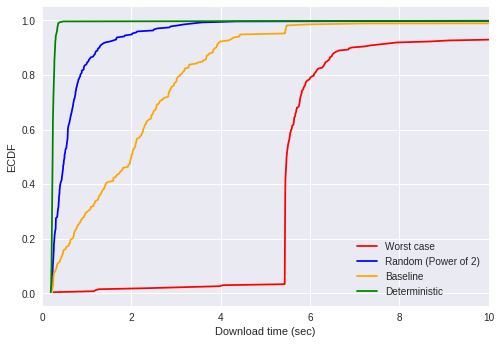

In [7]:
import random
import numpy as np

def plot_perf(df):
    
    clients = df.client.unique()
    for client in  clients:
        df_client = df.query('client == "'+client+'"')
        time_seq = df_client.time.unique()
        idx = df_client.groupby(['time'])['download'].transform(max) == df_client['download']
        worst_df = df_client[idx]
        
        #df_best = df_client.resample('10Min').mean()
        #print(df_best.head())
        idx = df_client.groupby(['time'])['download'].transform(min) == df_client['download']
        best_df = df_client[idx]
        rand_df = pd.DataFrame()
        uni_rand_df = pd.DataFrame()
        for time_st in time_seq:
            df_time = df_client.query("time == '"+time_st+"'")
            proxies = df_time.proxy.unique()
            if len(proxies) > 2:
                rand_choice = random.sample(set(proxies), 2)
                client1 = df_time.query('proxy == "'+rand_choice[0]+'"')
                client2 = df_time.query('proxy == "'+rand_choice[1]+'"')
                if float(client1.download.iloc[0]) > float(client2.download.iloc[0]):
                    rand_df = rand_df.append(client2)
                else:
                    rand_df = rand_df.append(client1)
                uni = random.sample(set(proxies),1)
                uni_rand_df = uni_rand_df.append(df_time.query('proxy == "'+uni[0]+'"'))
            else:
                rand_df = rand_df.append(df_time)
                uni_rand_df = uni_rand_df.append(df_time)
                
        labels = ['Worst case', 'Random (Power of 2)', 'Baseline', 'Deterministic']
        
        getECDF(worst_df.resample('10Min').mean(),'download').plot(color='red', legend = 'Worst case')
        getECDF(rand_df.resample('10Min').mean(),'download').plot(color='blue', legend='Random (Power of 2)')
        getECDF(uni_rand_df.resample('10Min').mean(),'download').plot(color='orange', legend='Random')
        getECDF(best_df.resample('10Min').mean(),'download').plot(color='green', legend = 'Best case')  
        plt.legend(labels)
        plt.xlabel("Download time (sec)")
        plt.ylabel("ECDF")
        plt.xlim(0,10)
        #plt.title(client)
        plt.show()
        
plot_perf(client_data)

In [34]:
import random
import numpy as np
import datetime

def plot_perf_5minutes(df):
    
    clients = df.client.unique()
    for client in  clients:
        df_client = df.query('client == "'+client+'"')
        time_seq = df_client.time.unique()
        
        
        worst_df = pd.DataFrame()
        best_df = pd.DataFrame()
        rand_df = pd.DataFrame()
        uni_rand_df = pd.DataFrame()
        next_time = datetime.datetime.strptime("2011/02/04 00:00", '%Y/%m/%d %H:%M')
        best = None
        worst = None
        rand = None
        uni = None
        
        
        for time_st in time_seq:
            time_stmp = datetime.datetime.strptime(time_st, '%Y/%m/%d %H:%M')
            if next_time < time_stmp:
                df_time = df_client.query("time == '"+time_st+"'")
                proxies = df_time.proxy.unique()
                best_df = best_df.append(df_time[df_time.download == df_time.download.max()])
                worst_df = worst_df.append(df_time[df_time.download == df_time.download.min()])
                if len(proxies) > 2:
                    rand_choice = random.sample(set(proxies), 2)
                    client1 = df_time.query('proxy == "'+rand_choice[0]+'"')
                    client2 = df_time.query('proxy == "'+rand_choice[1]+'"')
                    if float(client1.download.iloc[0]) > float(client2.download.iloc[0]):
                        rand_df = rand_df.append(client2)
                    else:
                        rand_df = rand_df.append(client1)
                    uni = random.sample(set(proxies),1)
                    uni_rand_df = uni_rand_df.append(df_time.query('proxy == "'+uni[0]+'"'))
                else:
                    rand_df = rand_df.append(df_time)
                    uni_rand_df = uni_rand_df.append(df_time)
  
        
plot_perf_5minutes(client_data)

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:11:00  2018/02/03 12:11        6.129061    6.3895     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-03 12:11:00        1048576  57064     65       0.260439  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:19:00  2018/02/03 12:19        0.007291  5.427816     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:19:00        1048576  5126     65       5.420525  
                                 time  start_transfer  download  status  \
time                                                                      
2018-

2018-02-03 12:45:00        1048576  5126     65       5.416886  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:46:00  2018/02/03 12:46        0.007293  5.419535     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:46:00        1048576  5126     65       5.412242  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:47:00  2018/02/03 12:47        0.006765  5.442618     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:47:00        1048576  5126     65       5.435853  
                                 time  start_transfer  download  status  \
time              

2018-02-03 13:14:00        1048576  5126     65       5.431323  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:15:00  2018/02/03 13:15        0.007053  5.643045     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:15:00        1048576  5126     65       5.635992  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:16:00  2018/02/03 13:16        0.007262  5.424063     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:16:00        1048576  5126     65       5.416801  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:43:00  2018/02/03 13:43        0.007544  5.423507     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:43:00        1048576  5126     65       5.415963  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:44:00  2018/02/03 13:44        0.007218  5.420343     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:44:00        1048576  5126     65       5.413125  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:12:00  2018/02/03 14:12        0.007243  5.440096     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:12:00        1048576  5126     65       5.432853  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:13:00  2018/02/03 14:13        0.007457  5.426417     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:13:00        1048576  5126     65        5.41896  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-03 14:40:00        1048576  5126     65       5.421642  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:41:00  2018/02/03 14:41        0.007293  5.423839     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:41:00        1048576  5126     65       5.416546  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:42:00  2018/02/03 14:42        0.007266  5.429185     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:42:00        1048576  5126     65       5.421919  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer   download  status  \
time                                                                       
2018-02-03 15:08:00  2018/02/03 15:08          0.7913  15.593872     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-03 15:08:00        1048576  10473     65      14.802572  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:09:00  2018/02/03 15:09        0.430868  6.191584     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:09:00        1048576  5126     65       5.760716  
                                 time  start_transfer  download  status  \
time                                                                      
20

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:36:00  2018/02/03 15:36        0.010212  5.426386     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:36:00        1048576  5126     65       5.416174  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:37:00  2018/02/03 15:37        0.007525  5.426298     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:37:00        1048576  5126     65       5.418773  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:04:00  2018/02/03 16:04        0.007044  5.433213     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:04:00        1048576  5126     65       5.426169  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:05:00  2018/02/03 16:05        0.006775  5.423269     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:05:00        1048576  5126     65       5.416494  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:32:00  2018/02/03 16:32        0.007264  5.426925     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:32:00        1048576  5126     65       5.419661  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:33:00  2018/02/03 16:33         0.00715  5.967231     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:33:00        1048576  5126     65       5.960081  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 17:18:00  2018/02/03 17:18        0.007328  5.422395     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 17:18:00        1048576  5126     65       5.415067  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 17:22:00  2018/02/03 17:22        0.007153  5.418967     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 17:22:00        1048576  5126     65       5.411814  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 19:05:00  2018/02/03 19:05        0.007028  5.423479     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 19:05:00        1048576  5126     65       5.416451  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 19:09:00  2018/02/03 19:09         0.00725  5.427796     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 19:09:00        1048576  5126     65       5.420546  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 20:48:00  2018/02/03 20:48        0.332917  6.184375     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-03 20:48:00        1048576  10473     65       5.851458  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 20:52:00  2018/02/03 20:52        0.008594  5.420395     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 20:52:00        1048576  5126     65       5.411801  
                                 time  start_transfer  download  status  \
time                                                                      
2018-

2018-02-03 22:31:00        1048576  5126     65        5.42038  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 22:35:00  2018/02/03 22:35        0.008073  5.427388     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 22:35:00        1048576  5126     65       5.419315  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 22:39:00  2018/02/03 22:39        0.007182  5.422408     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 22:39:00        1048576  5126     65       5.415226  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 00:21:00  2018/02/04 00:21          0.0076  5.422312     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 00:21:00        1048576  5126     65       5.414712  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 00:25:00  2018/02/04 00:25        0.007658  5.419206     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 00:25:00        1048576  5126     65       5.411548  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-04 02:28:00        1048576  5126     65       5.405182  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 02:32:00  2018/02/04 02:32         6.12075  6.237844     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 02:32:00        1048576  57064     65       0.117094  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 02:36:00  2018/02/04 02:36        0.007681  5.423058     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 02:36:00        1048576  5126     65       5.415377  
                                 time  start_transfer  download  status  \
time           

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 04:14:00  2018/02/04 04:14        0.007079  5.419513     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 04:14:00        1048576  5126     65       5.412434  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 04:18:00  2018/02/04 04:18         0.00723  5.424378     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 04:18:00        1048576  5126     65       5.417148  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 06:28:00  2018/02/04 06:28        0.007539  5.424421     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 06:28:00        1048576  5126     65       5.416882  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 06:32:00  2018/02/04 06:32        0.007333  5.421357     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 06:32:00        1048576  5126     65       5.414024  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-04 08:14:00        1048576  5126     65       5.411361  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 08:18:00  2018/02/04 08:18        0.007465  5.542408     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 08:18:00        1048576  5126     65       5.534943  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 08:22:00  2018/02/04 08:22        0.007739  5.421338     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 08:22:00        1048576  5126     65       5.413599  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 10:01:00  2018/02/04 10:01        0.007686  5.421022     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 10:01:00        1048576  5126     65       5.413336  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 10:05:00  2018/02/04 10:05        0.008731  5.460191     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 10:05:00        1048576  5126     65        5.45146  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-04 11:41:00         199440  11252     65     178.429747  
                                 time  start_transfer   download  status  \
time                                                                       
2018-02-04 11:50:00  2018/02/04 11:50       93.264697  93.522855     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 11:50:00        1048576  7193     65       0.258158  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 11:55:00  2018/02/04 11:55        0.007067  5.420315     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 11:55:00        1048576  5126     65       5.413248  
                                 time  start_transfer  download  status  \
time          

2018-02-04 13:31:00        1048576  10473     65      10.069679  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 13:35:00  2018/02/04 13:35        0.007067   5.43149     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 13:35:00        1048576  5126     65       5.424423  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 13:39:00  2018/02/04 13:39        0.007558   5.43519     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 13:39:00        1048576  5126     65       5.427632  
                                 time  start_transfer  download  status  \
time             

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 15:19:00  2018/02/04 15:19        0.237553  9.258131     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 15:19:00        1048576  10473     65       9.020578  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 15:23:00  2018/02/04 15:23        0.153877   7.17461     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 15:23:00        1048576  10473     65       7.020733  
                                 time  start_transfer  download  status  \
time                                                                      
20

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 17:04:00  2018/02/04 17:04        0.007678  6.237482     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 17:04:00        1048576  5126     65       6.229804  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 17:07:00  2018/02/04 17:07        0.047091  5.685694     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 17:07:00        1048576  10473     65       5.638603  
                                 time  start_transfer  download  status  \
time                                                                      
2018-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 18:59:00  2018/02/04 18:59        0.085007  5.490399     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 18:59:00        1048576  5126     65       5.405392  
                                 time  start_transfer    download  status  \
time                                                                        
2018-02-04 19:02:00  2018/02/04 19:02      111.869433  112.028689     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 19:02:00        1048576  57064     65       0.159256  
                                 time  start_transfer  download  status  \
time                                                                      

2018-02-04 20:47:00        1048576  5126     65       5.411726  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 20:51:00  2018/02/04 20:51        0.007325  5.422079     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 20:51:00        1048576  5126     65       5.414754  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 20:54:00  2018/02/04 20:54         0.00736  5.438939     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 20:54:00        1048576  5126     65       5.431579  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 22:47:00  2018/02/04 22:47        0.007309  5.436296     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 22:47:00        1048576  5126     65       5.428987  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 22:51:00  2018/02/04 22:51        0.007278  5.420174     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 22:51:00        1048576  5126     65       5.412896  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 00:39:00  2018/02/05 00:39        0.007436  5.420078     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 00:39:00        1048576  5126     65       5.412642  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 00:43:00  2018/02/05 00:43        0.006995  6.152127     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 00:43:00        1048576  5126     65       6.145132  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 02:40:00  2018/02/05 02:40         0.00706   5.41977     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 02:40:00        1048576  5126     65        5.41271  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 02:43:00  2018/02/05 02:43        0.007231  5.422539     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 02:43:00        1048576  5126     65       5.415308  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-05 04:37:00        1048576  5126     65       5.412466  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 04:41:00  2018/02/05 04:41        0.007504  5.423593     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 04:41:00        1048576  5126     65       5.416089  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 04:44:00  2018/02/05 04:44        0.007196  5.427405     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 04:44:00        1048576  5126     65       5.420209  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 06:30:00  2018/02/05 06:30        0.103066  5.512043     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 06:30:00        1048576  5126     65       5.408977  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 06:36:00  2018/02/05 06:36        0.064354  5.475695     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 06:36:00        1048576  5126     65       5.411341  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 08:22:00  2018/02/05 08:22        0.006821    5.4249     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 08:22:00        1048576  5126     65       5.418079  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 08:25:00  2018/02/05 08:25        0.006765  5.420777     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 08:25:00        1048576  5126     65       5.414012  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 04:53:00  2018/02/04 04:53        0.052013  1.857898     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 04:53:00        1048576  10473     65       1.805885  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 04:57:00  2018/02/04 04:57        0.069913  1.373937     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 04:57:00        1048576  10473     65       1.304024  
                                 time  start_transfer    download  status  \
time                                                                       

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:43:00  2018/02/03 12:43           0.014     5.429     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:43:00        1048576  5126     75          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:44:00  2018/02/03 12:44           0.016     5.428     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:44:00        1048576  5126     75          5.412  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:13:00  2018/02/03 13:13           0.012     6.785     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:13:00        1048576  5126     75          6.773  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:14:00  2018/02/03 13:14           0.015     5.433     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:14:00        1048576  5126     75          5.418  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-03 13:42:00        1048576  5126     75          5.414  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:43:00  2018/02/03 13:43           0.013     5.428     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:43:00        1048576  5126     75          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:44:00  2018/02/03 13:44           0.014     5.439     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:44:00        1048576  5126     75          5.425  
                                 time  start_transfer  download  status  \
time              

2018-02-03 14:12:00        1048576  5126     75          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:13:00  2018/02/03 14:13           0.013     5.434     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:13:00        1048576  5126     75          5.421  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:14:00  2018/02/03 14:14           0.013     5.425     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:14:00        1048576  5126     75          5.412  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:41:00  2018/02/03 14:41           0.016     5.435     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:41:00        1048576  5126     75          5.419  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:42:00  2018/02/03 14:42           0.015     5.429     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:42:00        1048576  5126     75          5.414  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:08:00  2018/02/03 15:08           0.297    12.915     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-03 15:08:00        1048576  10473     75         12.618  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:09:00  2018/02/03 15:09           0.013     5.429     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:09:00        1048576  5126     75          5.416  
                                 time  start_transfer  download  status  \
time                                                                      
2018-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:37:00  2018/02/03 15:37           0.014     5.425     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:37:00        1048576  5126     75          5.411  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:38:00  2018/02/03 15:38           0.016     5.442     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:38:00        1048576  5126     75          5.426  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-03 16:06:00        1048576  5126     75          5.412  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:07:00  2018/02/03 16:07           0.013     5.427     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:07:00        1048576  5126     75          5.414  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:08:00  2018/02/03 16:08           0.016     5.428     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:08:00        1048576  5126     75          5.412  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:34:00  2018/02/03 16:34           0.016     6.948     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:34:00        1048576  5126     75          6.932  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:35:00  2018/02/03 16:35           0.013     5.425     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:35:00        1048576  5126     75          5.412  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 17:26:00  2018/02/03 17:26           0.015     5.436     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 17:26:00        1048576  5126     75          5.421  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 17:29:00  2018/02/03 17:29           0.016     5.426     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 17:29:00        1048576  5126     75           5.41  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 19:09:00  2018/02/03 19:09            0.11      5.52     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 19:09:00        1048576  5126     75           5.41  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 19:13:00  2018/02/03 19:13           0.057     6.242     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 19:13:00        1048576  5126     75          6.185  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 20:52:00  2018/02/03 20:52           0.112     5.524     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 20:52:00        1048576  5126     75          5.412  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 20:56:00  2018/02/03 20:56           0.053     5.463     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 20:56:00        1048576  5126     75           5.41  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 22:42:00  2018/02/03 22:42           0.647     7.454     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 22:42:00        1048576  5126     75          6.807  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 22:46:00  2018/02/03 22:46           0.014     5.427     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 22:46:00        1048576  5126     75          5.413  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 00:28:00  2018/02/04 00:28            0.02     5.435     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 00:28:00        1048576  5126     75          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 00:32:00  2018/02/04 00:32           0.016     5.441     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 00:32:00        1048576  5126     75          5.425  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 02:28:00  2018/02/04 02:28           0.014     5.429     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 02:28:00        1048576  5126     75          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 02:32:00  2018/02/04 02:32           0.021     5.894     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 02:32:00        1048576  5126     75          5.873  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 04:14:00  2018/02/04 04:14           0.012     5.427     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 04:14:00        1048576  5126     75          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 04:18:00  2018/02/04 04:18           0.013     5.427     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 04:18:00        1048576  5126     75          5.414  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 06:24:00  2018/02/04 06:24           0.014     5.426     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 06:24:00        1048576  5126     75          5.412  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 06:28:00  2018/02/04 06:28           0.015     5.424     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 06:28:00        1048576  5126     75          5.409  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 08:07:00  2018/02/04 08:07           0.015     5.428     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 08:07:00        1048576  5126     75          5.413  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 08:11:00  2018/02/04 08:11           0.016     5.436     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 08:11:00        1048576  5126     75           5.42  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 09:50:00  2018/02/04 09:50           0.014     5.433     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 09:50:00        1048576  5126     75          5.419  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 09:54:00  2018/02/04 09:54           0.019     5.431     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 09:54:00        1048576  5126     75          5.412  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-04 11:33:00        1048576  5126     75          6.134  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 11:37:00  2018/02/04 11:37           0.014     5.436     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 11:37:00        1048576  5126     75          5.422  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 11:41:00  2018/02/04 11:41           1.805   179.415     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 11:41:00         763450  11252     75         177.61  
                                 time  start_transfer  download  status  \
time           

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 13:24:00  2018/02/04 13:24           0.122     5.674     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 13:24:00        1048576  10473     75          5.552  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 13:27:00  2018/02/04 13:27           0.015     5.435     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 13:27:00        1048576  5126     75           5.42  
                                 time  start_transfer  download  status  \
time                                                                      
2018-

2018-02-04 15:04:00        1048576  5126     75          5.425  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 15:07:00  2018/02/04 15:07           0.581     6.608     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 15:07:00        1048576  5126     75          6.027  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 15:11:00  2018/02/04 15:11           0.585     7.592     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 15:11:00        1048576  10473     75          7.007  
                                 time  start_transfer  download  status  \
time           

2018-02-04 16:51:00        1048576  5126     75          5.439  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 16:55:00  2018/02/04 16:55           0.015     5.432     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 16:55:00        1048576  5126     75          5.417  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 16:59:00  2018/02/04 16:59           0.095     5.503     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 16:59:00        1048576  5126     75          5.408  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 18:49:00  2018/02/04 18:49           0.012      5.44     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 18:49:00        1048576  5126     75          5.428  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 18:52:00  2018/02/04 18:52           0.016     5.429     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 18:52:00        1048576  5126     75          5.413  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-04 20:40:00        1048576  5126     75          5.443  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 20:43:00  2018/02/04 20:43           0.015     5.426     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 20:43:00        1048576  5126     75          5.411  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 20:47:00  2018/02/04 20:47           0.014     5.451     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 20:47:00        1048576  5126     75          5.437  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 22:36:00  2018/02/04 22:36           0.027      5.44     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 22:36:00        1048576  5126     75          5.413  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 22:40:00  2018/02/04 22:40           0.018     5.427     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 22:40:00        1048576  5126     75          5.409  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 00:29:00  2018/02/05 00:29           0.013     5.432     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 00:29:00        1048576  5126     75          5.419  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 00:36:00  2018/02/05 00:36           0.014     5.435     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 00:36:00        1048576  5126     75          5.421  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 02:22:00  2018/02/05 02:22           0.012     5.427     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 02:22:00        1048576  5126     75          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 02:26:00  2018/02/05 02:26           0.013     5.429     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 02:26:00        1048576  5126     75          5.416  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 04:25:00  2018/02/05 04:25           0.054     5.455     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 04:25:00        1048576  5126     75          5.401  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 04:29:00  2018/02/05 04:29            0.07     5.474     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 04:29:00        1048576  5126     75          5.404  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 06:13:00  2018/02/05 06:13           0.011     5.429     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 06:13:00        1048576  5126     75          5.418  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 06:16:00  2018/02/05 06:16           0.012     5.427     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 06:16:00        1048576  5126     75          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 08:09:00  2018/02/05 08:09           0.014     5.428     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 08:09:00        1048576  5126     75          5.414  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 08:13:00  2018/02/05 08:13           0.013     5.886     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 08:13:00        1048576  5126     75          5.873  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 04:32:00  2018/02/04 04:32           0.066      1.94     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 04:32:00        1048576  10473     75          1.874  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 04:36:00  2018/02/04 04:36           0.041     1.631     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 04:36:00        1048576  10473     75           1.59  
                                 time  start_transfer  download  status  \
time                                                                      
20

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:39:00  2018/02/03 12:39        0.010268  5.427296     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:39:00        1048576  5126    108       5.417028  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:40:00  2018/02/03 12:40        0.140044  5.544248     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:40:00        1048576  5126    108       5.404204  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-03 13:08:00        1048576  10473    108       5.751683  
                                 time  start_transfer   download  status  \
time                                                                       
2018-02-03 13:09:00  2018/02/03 13:09        0.532547  10.749767     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-03 13:09:00        1048576  10473    108       10.21722  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:10:00  2018/02/03 13:10        0.143904  6.244069     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-03 13:10:00        1048576  10473    108       6.100165  
                                 time  start_transfer  download  status  \
time    

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:38:00  2018/02/03 13:38        0.010314  5.435602     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:38:00        1048576  5126    108       5.425288  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:39:00  2018/02/03 13:39        0.010259  5.425789     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:39:00        1048576  5126    108        5.41553  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:08:00  2018/02/03 14:08        0.010496  6.441427     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:08:00        1048576  5126    108       6.430931  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:09:00  2018/02/03 14:09        0.012157  6.047522     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:09:00        1048576  5126    108       6.035365  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:37:00  2018/02/03 14:37        0.010392  5.426618     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:37:00        1048576  5126    108       5.416226  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:38:00  2018/02/03 14:38        0.010529  5.432636     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:38:00        1048576  5126    108       5.422107  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-03 15:06:00        1048576  5126    108       5.415997  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:07:00  2018/02/03 15:07        0.010687  5.423227     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:07:00        1048576  5126    108        5.41254  
                                 time  start_transfer   download  status  \
time                                                                       
2018-02-03 15:08:00  2018/02/03 15:08        0.906213  15.716853     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-03 15:08:00        1048576  10473    108       14.81064  
                                 time  start_transfer  download  status  \
time        

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:35:00  2018/02/03 15:35        0.010211  5.426343     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:35:00        1048576  5126    108       5.416132  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:36:00  2018/02/03 15:36        0.010221  5.425279     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:36:00        1048576  5126    108       5.415058  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:02:00  2018/02/03 16:02        0.010412  5.426993     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:02:00        1048576  5126    108       5.416581  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:03:00  2018/02/03 16:03        0.010324  5.424748     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:03:00        1048576  5126    108       5.414424  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:30:00  2018/02/03 16:30        0.319702  5.828694     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:30:00        1048576  5126    108       5.508992  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:31:00  2018/02/03 16:31        0.010842  5.427832     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:31:00        1048576  5126    108        5.41699  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 17:15:00  2018/02/03 17:15        0.010709  5.426653     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 17:15:00        1048576  5126    108       5.415944  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 17:18:00  2018/02/03 17:18        0.010603  5.423578     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 17:18:00        1048576  5126    108       5.412975  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 19:02:00  2018/02/03 19:02        0.960488  6.376169     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 19:02:00        1048576  5126    108       5.415681  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 19:05:00  2018/02/03 19:05        0.010628  5.433308     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 19:05:00        1048576  5126    108        5.42268  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-03 20:45:00        1048576  5126    108        5.41539  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 20:48:00  2018/02/03 20:48        0.010571  5.425031     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 20:48:00        1048576  5126    108        5.41446  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 20:52:00  2018/02/03 20:52         0.01168  5.426148     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 20:52:00        1048576  5126    108       5.414468  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 22:28:00  2018/02/03 22:28        0.010698   5.43287     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 22:28:00        1048576  5126    108       5.422172  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 22:31:00  2018/02/03 22:31        0.010536  5.423429     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 22:31:00        1048576  5126    108       5.412893  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-04 00:03:00        1048576  5126    108       5.416779  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 00:06:00  2018/02/04 00:06        0.035036  5.443124     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 00:06:00        1048576  5126    108       5.408088  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 00:10:00  2018/02/04 00:10        0.010772  5.437544     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 00:10:00        1048576  5126    108       5.426772  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 01:49:00  2018/02/04 01:49        0.010386  5.746831     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 01:49:00        1048576  5126    108       5.736445  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 01:52:00  2018/02/04 01:52        0.010344    5.4243     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 01:52:00        1048576  5126    108       5.413956  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 03:56:00  2018/02/04 03:56        0.010282  5.423079     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 03:56:00        1048576  5126    108       5.412797  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 03:59:00  2018/02/04 03:59         6.12042  6.216612     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 03:59:00        1048576  57064    108       0.096192  
                                 time  start_transfer  download  status  \
time                                                                      
2018-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 06:10:00  2018/02/04 06:10        0.010501  5.421953     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 06:10:00        1048576  5126    108       5.411452  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 06:13:00  2018/02/04 06:13        0.846672   6.25147     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 06:13:00        1048576  5126    108       5.404798  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 07:49:00  2018/02/04 07:49        0.010638  6.078355     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 07:49:00        1048576  5126    108       6.067717  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 07:52:00  2018/02/04 07:52        0.010345  5.435581     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 07:52:00        1048576  5126    108       5.425236  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 09:31:00  2018/02/04 09:31        0.010638  5.426589     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 09:31:00        1048576  5126    108       5.415951  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 09:35:00  2018/02/04 09:35        0.010535  5.428353     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 09:35:00        1048576  5126    108       5.417818  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-04 11:15:00        1048576  5126    108       5.415053  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 11:19:00  2018/02/04 11:19        0.653403  6.067154     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 11:19:00        1048576  5126    108       5.413751  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 11:23:00  2018/02/04 11:23        0.010903   5.44011     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 11:23:00        1048576  5126    108       5.429207  
                                 time  start_transfer  download  status  \
time              

2018-02-04 13:06:00        1048576  5126    108       5.412886  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 13:10:00  2018/02/04 13:10        0.085278  5.938664     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 13:10:00        1048576  10473    108       5.853386  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 13:14:00  2018/02/04 13:14        0.045211  5.474321     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 13:14:00        1048576  5126    108        5.42911  
                                 time  start_transfer  download  status  \
time           

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 14:54:00  2018/02/04 14:54        0.055142  5.462941     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 14:54:00        1048576  5126    108       5.407799  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 14:57:00  2018/02/04 14:57        0.045058  5.456288     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 14:57:00        1048576  5126    108        5.41123  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 16:38:00  2018/02/04 16:38        0.853447  7.235721     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 16:38:00        1048576  5126    108       6.382274  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 16:41:00  2018/02/04 16:41        0.010357  5.432295     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 16:41:00        1048576  5126    108       5.421938  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 18:26:00  2018/02/04 18:26        0.012593  5.447458     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 18:26:00        1048576  5126    108       5.434865  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 18:30:00  2018/02/04 18:30        0.010755  5.425101     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 18:30:00        1048576  5126    108       5.414346  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 20:20:00  2018/02/04 20:20        0.011127  5.429507     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 20:20:00        1048576  5126    108        5.41838  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 20:24:00  2018/02/04 20:24         0.01127  5.437485     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 20:24:00        1048576  5126    108       5.426215  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 22:13:00  2018/02/04 22:13        0.010719  5.447393     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 22:13:00        1048576  5126    108       5.436674  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 22:17:00  2018/02/04 22:17        0.010453  5.425532     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 22:17:00        1048576  5126    108       5.415079  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 23:59:00  2018/02/04 23:59        0.089172  5.493583     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 23:59:00        1048576  5126    108       5.404411  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 00:06:00  2018/02/05 00:06        0.010488  5.429355     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 00:06:00        1048576  5126    108       5.418867  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-05 01:52:00        1048576  5126    108       6.258001  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 01:56:00  2018/02/05 01:56        0.010561  5.435228     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 01:56:00        1048576  5126    108       5.424667  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 02:00:00  2018/02/05 02:00        0.010621  5.423169     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 02:00:00        1048576  5126    108       5.412548  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 03:52:00  2018/02/05 03:52        0.045363  5.450043     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 03:52:00        1048576  5126    108        5.40468  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 03:55:00  2018/02/05 03:55        0.098276  5.518893     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 03:55:00        1048576  5126    108       5.420617  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-05 05:37:00        1048576  5126    108       5.423739  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 05:41:00  2018/02/05 05:41        0.010379  5.432318     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 05:41:00        1048576  5126    108       5.421939  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 05:44:00  2018/02/05 05:44        0.010659  5.426984     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 05:44:00        1048576  5126    108       5.416325  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer    download  status  \
time                                                                        
2018-02-05 07:32:00  2018/02/05 07:32      125.426169  125.577034     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-05 07:32:00        1048576  57064    108       0.150865  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 07:37:00  2018/02/05 07:37        0.010323  5.424473     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 07:37:00        1048576  5126    108        5.41415  
                                 time  start_transfer  download  status  \
time                                                                      

2018-02-05 09:15:00        1048576  5126    108       5.408033  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 09:18:00  2018/02/05 09:18         0.87487  7.169488     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 09:18:00        1048576  5126    108       6.294618  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 02:07:00  2018/02/04 02:07        0.081185  3.036858     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 02:07:00        1048576  10473    108       2.955673  
                                 time  start_transfer  download  status  \
time           

2018-02-03 12:29:00        1048576  5126    132          5.418  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:30:00  2018/02/03 12:30           0.029     6.695     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:30:00        1048576  5126    132          6.666  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:31:00  2018/02/03 12:31           0.014     5.434     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:31:00        1048576  5126    132           5.42  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 12:59:00  2018/02/03 12:59           0.018     5.448     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 12:59:00        1048576  5126    132           5.43  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:00:00  2018/02/03 13:00           0.017     6.723     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:00:00        1048576  5126    132          6.706  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:28:00  2018/02/03 13:28           0.016     5.449     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:28:00        1048576  5126    132          5.433  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:29:00  2018/02/03 13:29           0.018     5.436     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:29:00        1048576  5126    132          5.418  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:57:00  2018/02/03 13:57           0.016     5.435     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:57:00        1048576  5126    132          5.419  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 13:58:00  2018/02/03 13:58           0.019     5.445     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 13:58:00        1048576  5126    132          5.426  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:25:00  2018/02/03 14:25           0.015     5.437     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:25:00        1048576  5126    132          5.422  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:26:00  2018/02/03 14:26           0.018     5.444     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:26:00        1048576  5126    132          5.426  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:53:00  2018/02/03 14:53           0.017     5.437     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:53:00        1048576  5126    132           5.42  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 14:54:00  2018/02/03 14:54           0.017     6.166     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 14:54:00        1048576  5126    132          6.149  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:22:00  2018/02/03 15:22           0.018     5.434     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:22:00        1048576  5126    132          5.416  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:23:00  2018/02/03 15:23           0.016     5.445     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:23:00        1048576  5126    132          5.429  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:50:00  2018/02/03 15:50           0.585     8.721     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:50:00        1048576  5126    132          8.136  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 15:51:00  2018/02/03 15:51           0.017     5.432     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 15:51:00        1048576  5126    132          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:18:00  2018/02/03 16:18           0.018     5.434     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:18:00        1048576  5126    132          5.416  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:19:00  2018/02/03 16:19            0.02     5.446     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:19:00        1048576  5126    132          5.426  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:46:00  2018/02/03 16:46           0.023     5.443     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:46:00        1048576  5126    132           5.42  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 16:47:00  2018/02/03 16:47           0.017     5.441     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 16:47:00        1048576  5126    132          5.424  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-03 18:10:00        1048576  5126    132          5.422  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 18:14:00  2018/02/03 18:14           0.452     7.148     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 18:14:00        1048576  5126    132          6.696  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 18:17:00  2018/02/03 18:17           1.615    10.053     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 18:17:00        1048576  5126    132          8.438  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 19:53:00  2018/02/03 19:53           0.023     5.443     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 19:53:00        1048576  5126    132           5.42  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 19:57:00  2018/02/03 19:57           0.037     6.383     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 19:57:00        1048576  5126    132          6.346  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 21:36:00  2018/02/03 21:36           0.021      5.44     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 21:36:00        1048576  5126    132          5.419  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 21:40:00  2018/02/03 21:40           0.014     5.434     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 21:40:00        1048576  5126    132           5.42  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 23:23:00  2018/02/03 23:23           0.015     5.436     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 23:23:00        1048576  5126    132          5.421  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-03 23:26:00  2018/02/03 23:26            0.02     5.441     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-03 23:26:00        1048576  5126    132          5.421  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 01:01:00  2018/02/04 01:01           0.018     5.451     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 01:01:00        1048576  5126    132          5.433  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 01:05:00  2018/02/04 01:05           0.017     5.441     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 01:05:00        1048576  5126    132          5.424  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 03:05:00  2018/02/04 03:05           0.021      5.43     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 03:05:00        1048576  5126    132          5.409  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 03:08:00  2018/02/04 03:08           0.015     5.475     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 03:08:00        1048576  5126    132           5.46  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 05:19:00  2018/02/04 05:19           0.015     5.441     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 05:19:00        1048576  5126    132          5.426  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 05:22:00  2018/02/04 05:22           0.016      5.44     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 05:22:00        1048576  5126    132          5.424  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 06:57:00  2018/02/04 06:57           0.015     8.241     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 06:57:00        1048576  5126    132          8.226  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 07:01:00  2018/02/04 07:01           0.017     5.434     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 07:01:00        1048576  5126    132          5.417  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 08:40:00  2018/02/04 08:40           0.018     5.435     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 08:40:00        1048576  5126    132          5.417  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 08:44:00  2018/02/04 08:44           0.017     5.446     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 08:44:00        1048576  5126    132          5.429  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 10:20:00  2018/02/04 10:20           0.016     5.435     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 10:20:00        1048576  5126    132          5.419  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 10:24:00  2018/02/04 10:24           0.015     5.447     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 10:24:00        1048576  5126    132          5.432  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 12:12:00  2018/02/04 12:12           0.015     5.443     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 12:12:00        1048576  5126    132          5.428  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 12:16:00  2018/02/04 12:16           0.021      5.45     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 12:16:00        1048576  5126    132          5.429  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 13:55:00  2018/02/04 13:55           0.107     7.137     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 13:55:00        1048576  10473    132           7.03  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 13:59:00  2018/02/04 13:59           6.125     6.353     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-04 13:59:00        1048576  57064    132          0.228  
                                 time  start_transfer  download  status  \
time                                                                      
20

2018-02-04 15:43:00        1048576  5126    132          6.254  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 15:47:00  2018/02/04 15:47           0.019      5.47     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 15:47:00        1048576  5126    132          5.451  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 15:50:00  2018/02/04 15:50           0.014     5.434     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 15:50:00        1048576  5126    132           5.42  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 17:27:00  2018/02/04 17:27           0.016     5.445     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 17:27:00        1048576  5126    132          5.429  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 17:30:00  2018/02/04 17:30           0.016     5.464     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 17:30:00        1048576  5126    132          5.448  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-04 19:21:00        1048576  5126    132          5.422  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 19:25:00  2018/02/04 19:25           0.014     5.441     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 19:25:00        1048576  5126    132          5.427  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 19:29:00  2018/02/04 19:29           0.015     5.447     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 19:29:00        1048576  5126    132          5.432  
                                 time  start_transfer  download  status  \
time              

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 21:18:00  2018/02/04 21:18           0.014     5.431     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 21:18:00        1048576  5126    132          5.417  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 21:22:00  2018/02/04 21:22           0.018     5.438     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 21:22:00        1048576  5126    132           5.42  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 23:18:00  2018/02/04 23:18           0.412     5.827     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 23:18:00        1048576  5126    132          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-04 23:22:00  2018/02/04 23:22           0.017     5.443     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-04 23:22:00        1048576  5126    132          5.426  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 01:12:00  2018/02/05 01:12           0.015     5.439     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 01:12:00        1048576  5126    132          5.424  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 01:15:00  2018/02/05 01:15           0.037     5.461     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 01:15:00        1048576  5126    132          5.424  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 03:07:00  2018/02/05 03:07           0.051     5.466     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 03:07:00        1048576  5126    132          5.415  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 03:14:00  2018/02/05 03:14           0.066     5.473     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 03:14:00        1048576  5126    132          5.407  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

2018-02-05 04:58:00        1048576  5126    132          5.409  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 05:02:00  2018/02/05 05:02         100.088   100.388     200   

                     download_size  proxy client  download_time  
time                                                             
2018-02-05 05:02:00        1048576  57064    132            0.3  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 05:07:00  2018/02/05 05:07           0.052     5.477     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 05:07:00        1048576  5126    132          5.425  
                                 time  start_transfer  download  status  \
time           

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 06:55:00  2018/02/05 06:55           0.017     5.433     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 06:55:00        1048576  5126    132          5.416  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 06:58:00  2018/02/05 06:58           0.019     5.466     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 06:58:00        1048576  5126    132          5.447  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-

                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 08:37:00  2018/02/05 08:37           0.019     5.446     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 08:37:00        1048576  5126    132          5.427  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-05 08:41:00  2018/02/05 08:41            0.02     5.439     200   

                     download_size proxy client  download_time  
time                                                            
2018-02-05 08:41:00        1048576  5126    132          5.419  
                                 time  start_transfer  download  status  \
time                                                                      
2018-02-